# Import Important Libraries

In [1]:
import tensorflow as tf

2024-05-04 10:32:31.573311: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-04 10:32:39.868274: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-04 10:33:30.823433: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import imghdr

In [6]:
from tensorflow import keras

In [7]:
os.path.join('data', 'happy')

'data/happy'

In [9]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

# 2. Remove dodgy images

In [10]:
data_dir = './Data/'

In [11]:
image_exists = ['jpg', 'jpeg', 'bmp', 'png']

In [15]:
for images_classes in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, images_classes)):
        image_path = os.path.join(data_dir, images_classes, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exists:
                print('Image not esist in list {}'.format(image_path))
                os.remove(image_path)
        except:
            print('Issue with image {}'.format(image_path))

Image not esist in list ./Data/happy_peple/traitshappypeople.jpg
Image not esist in list ./Data/happy_peple/vector.svg
Image not esist in list ./Data/happy_peple/vector10.svg
Image not esist in list ./Data/happy_peple/vector2.svg
Image not esist in list ./Data/happy_peple/vector3.svg
Image not esist in list ./Data/happy_peple/vector4.svg
Image not esist in list ./Data/happy_peple/vector5.svg
Image not esist in list ./Data/happy_peple/vector6.svg
Image not esist in list ./Data/happy_peple/vector7.svg
Image not esist in list ./Data/happy_peple/vector8.svg
Image not esist in list ./Data/happy_peple/vector9.svg
Image not esist in list ./Data/happy_peple/Happy20People.jpg
Image not esist in list ./Data/happy_peple/depositphotos_317939792-stock-photo-young-woman-isolated-yellow-background.jpg
Image not esist in list ./Data/happy_peple/depositphotos_391577690-stock-photo-cheerful-woman-outstretched-hands-sitting.jpg
Image not esist in list ./Data/happy_peple/depositphotos_8807359-stock-photo-

# 3. Load Data

In [20]:
data = tf.keras.utils.image_dataset_from_directory('./Data/')

Found 315 files belonging to 2 classes.


In [21]:
data_iterator = data.as_numpy_iterator()

In [80]:
batch = data_iterator.next()

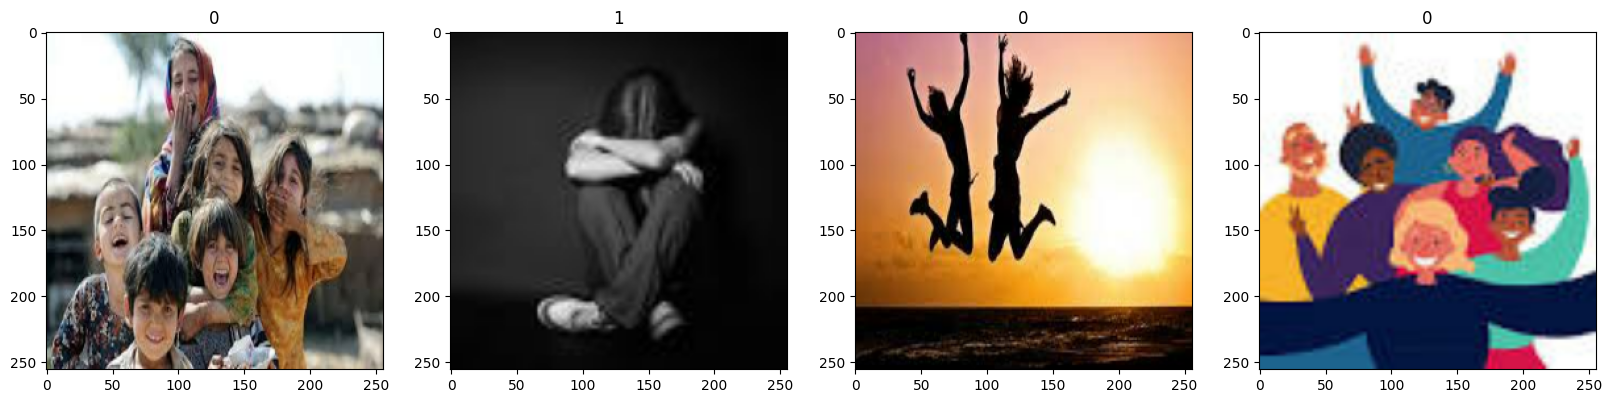

In [81]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 3. Scale Data

In [26]:
data = data.map(lambda x, y: (x/255, y))

In [27]:
data.as_numpy_iterator().next()

(array([[[[0.972549  , 0.9882353 , 0.9843137 ],
          [0.972549  , 0.9882353 , 0.9843137 ],
          [0.97267157, 0.98835784, 0.9844363 ],
          ...,
          [0.99215686, 0.99215686, 0.99215686],
          [0.99215686, 0.99215686, 0.99215686],
          [0.99215686, 0.99215686, 0.99215686]],
 
         [[0.972549  , 0.9882353 , 0.9843137 ],
          [0.972549  , 0.9882353 , 0.9843137 ],
          [0.9689951 , 0.98468137, 0.9807598 ],
          ...,
          [0.99215686, 0.99215686, 0.99215686],
          [0.99215686, 0.99215686, 0.99215686],
          [0.99215686, 0.99215686, 0.99215686]],
 
         [[0.972549  , 0.9882353 , 0.9843137 ],
          [0.972549  , 0.9882353 , 0.9843137 ],
          [0.96482843, 0.9805147 , 0.97659314],
          ...,
          [0.99215686, 0.99215686, 0.99215686],
          [0.99215686, 0.99215686, 0.99215686],
          [0.99215686, 0.99215686, 0.99215686]],
 
         ...,
 
         [[0.52156866, 0.45490196, 0.34509805],
          [0.74509

# 4. Split Data

In [28]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [29]:
train_size

7

In [47]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [48]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [50]:
model = Sequential()

In [51]:
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/media/muhammad-umer-khan/0E1083D91083C665/DATA SCIENCE/Python_Files/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [53]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

In [55]:
hist = model.fit(train, epochs=20, validation_data=val)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.5149 - loss: 0.8363 - val_accuracy: 0.5156 - val_loss: 0.7537
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 27s 4s/step - accuracy: 0.5632 - loss: 0.6798 - val_accuracy: 0.7969 - val_loss: 0.6322
Epoch 3/20


Corrupt JPEG data: 608 extraneous bytes before marker 0xc4


7/7 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 0.7749 - loss: 0.6376 - val_accuracy: 0.7031 - val_loss: 0.5420
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7610 - loss: 0.5257

2024-05-04 11:33:16.592448: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 ━━━━━━━━━━━━━━━━━━━━ 27s 4s/step - accuracy: 0.7608 - loss: 0.5232 - val_accuracy: 0.7656 - val_loss: 0.4387
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 29s 4s/step - accuracy: 0.7705 - loss: 0.5235 - val_accuracy: 0.9062 - val_loss: 0.3638
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.8377 - loss: 0.4098 - val_accuracy: 0.8125 - val_loss: 0.3860
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.8963 - loss: 0.2791 - val_accuracy: 0.8750 - val_loss: 0.3174
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.8375 - loss: 0.3327 - val_accuracy: 0.9062 - val_loss: 0.2301
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9251 - loss: 0.2288

2024-05-04 11:35:27.199660: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.9261 - loss: 0.2275 - val_accuracy: 0.9531 - val_loss: 0.1865
Epoch 10/20


Corrupt JPEG data: 709 extraneous bytes before marker 0xc4


7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9538 - loss: 0.1419 - val_accuracy: 0.9219 - val_loss: 0.1557
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.9352 - loss: 0.1362 - val_accuracy: 0.9688 - val_loss: 0.0956
Epoch 12/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.9870 - loss: 0.0995 - val_accuracy: 1.0000 - val_loss: 0.0764
Epoch 13/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.9590 - loss: 0.0803 - val_accuracy: 0.9844 - val_loss: 0.0696
Epoch 14/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.9772 - loss: 0.0470 - val_accuracy: 0.9844 - val_loss: 0.0466
Epoch 15/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.9957 - loss: 0.0383 - val_accuracy: 1.0000 - val_loss: 0.0335
Epoch 16/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.9819 - loss: 0.0460 - val_accuracy: 1.0000 - val_loss: 0.0331
Epoch 17/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.9982 - loss: 0.0310 - val_accuracy: 0.9688 - val_loss: 0.0593
Epoch 18/20


Corrupt JPEG data: bad Huffman code


7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.9965 - loss: 0.0202 - val_accuracy: 1.0000 - val_loss: 0.0064
Epoch 20/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 1.0000 - loss: 0.0137 - val_accuracy: 0.9844 - val_loss: 0.0711


# 7. Plot Perfomance

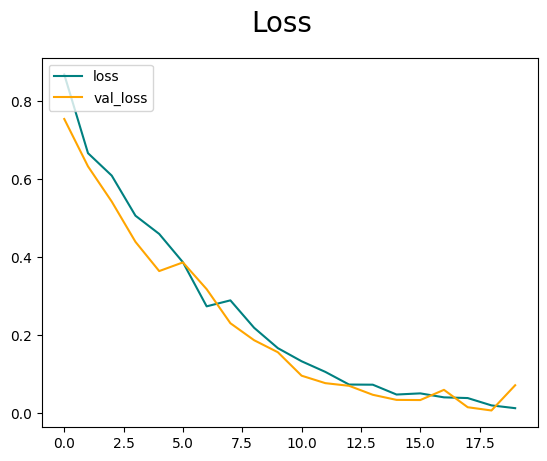

In [56]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

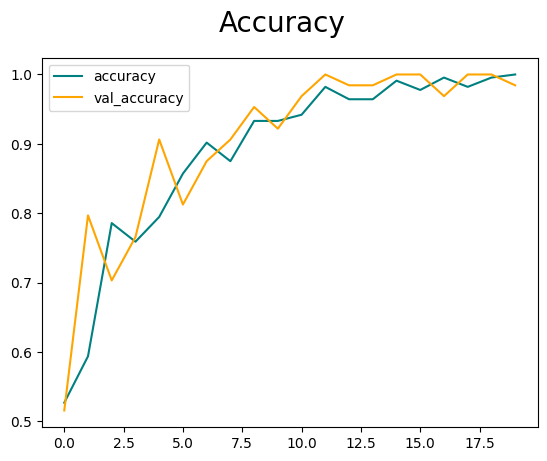

In [57]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 8. Evaluate

In [58]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [59]:
pre = Precision()
recall = Recall()
acc = BinaryAccuracy()


In [62]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    recall.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 802ms/step


2024-05-04 11:43:20.624116: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [64]:
print(pre.result(), recall.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 9. Test

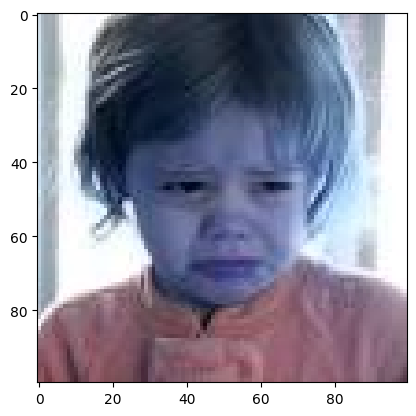

In [82]:
img = cv2.imread('./Data/sad_people/image6.jpeg')
plt.imshow(img);plt.show()

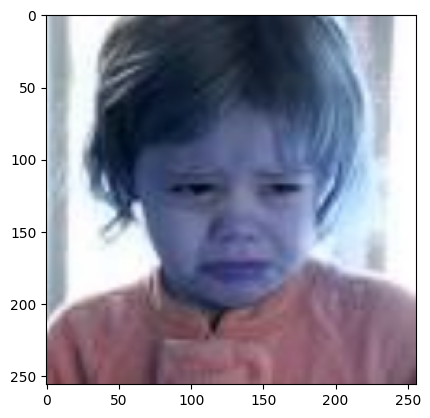

In [83]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [84]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


In [85]:
yhat

array([[0.98170656]], dtype=float32)

In [86]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
